[0.07825958330029821, 0.2040201816228051, 0.37045158720599863, 0.41190738884219813, 0.4550073388632464, 0.4735466316114762, 0.4403487764205457, 0.3757168799464688, 0.3391576381393253, 0.29883153431563014, 0.17499891770355866, 0.10673709009902498, 0.06786402353805604, 0.04914416354266126, 0.0340924707907244, 0.027389693011611555, 0.02353286071269384, 0.017832195924917704]


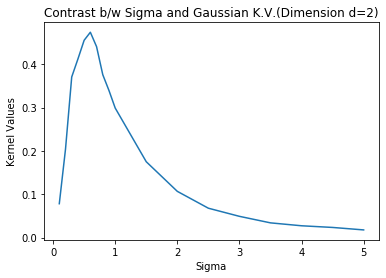

In [5]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10
dim=2

def gaussian_kernel(distances,sigma=1.0): 
    kernel_vals = np.exp( - (distances/sigma) **2) 
    return kernel_vals

def distance_from_origin(data):
    temp_sum=0
    for k in range(dim):
        temp_sum+=data[k]**2
    dist=temp_sum**0.5
    return dist
    
random.seed(100)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))

sigmas=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2,2.5,3,3.5,4,4.5,5]
final_kernel_vals=[]

for sigma in sigmas:
    centroid, label = kmeans2(actual_data,M,minit='points')
    #print(centroid)
    centroid_distances_from_center=np.zeros(M)
       
    for i in range(M):
        centroid_distances_from_center[i]=distance_from_origin(centroid[i])
    #print(centroid_distances_from_center)
        
    farthest_centroid_distance=centroid_distances_from_center[0]
    f=0
    store_f=0
    for c in centroid_distances_from_center:
        if c>farthest_centroid_distance:
            farthest_centroid_distance=c
            store_f=f
        f=f+1
            
    farthest_centroid=centroid[store_f]
    #print(farthest_centroid)
        
    nearest_centroid_distance=centroid_distances_from_center[0]
    n=0
    store_n=0
    for c in centroid_distances_from_center:
        if c<nearest_centroid_distance:
            nearest_centroid_distance=c
            store_n=n
        n=n+1
            
    nearest_centroid=centroid[store_n]
    #print(nearest_centroid)
        
    distances_from_farthest_centroid = []
    distances_from_nearest_centroid = []
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-farthest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_farthest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-nearest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_nearest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    kernel_vals_for_farthest_centroid=np.zeros(N)
    kernel_vals_for_nearest_centroid=np.zeros(N)
    for i in range(N):
        kernel_vals_for_farthest_centroid[i] = gaussian_kernel(distances_from_farthest_centroid[i],sigma)
        kernel_vals_for_nearest_centroid[i] = gaussian_kernel(distances_from_nearest_centroid[i],sigma)
    
    temp_diff=0
    for l in range(N):
        temp_diff+=abs(kernel_vals_for_farthest_centroid[l]-kernel_vals_for_nearest_centroid[l])
    
    final_kernel_vals.append((1/N)*temp_diff)
        
#print(sigmas)
print(final_kernel_vals)
fig, ax = plt.subplots()
ax.set_title("Contrast b/w Sigma and Gaussian K.V.(Dimension d="+str(dim)+")")
ax.set_xlabel('Sigma')
ax.set_ylabel('Kernel Values')
plt.plot(sigmas,final_kernel_vals)
plt.savefig('Contrast between Sigma and Gaussian Kernel Values for dim 2')
plt.show()



[1.5905985384915488e-263, 9.32355533034279e-66, 3.184543881445097e-28, 3.4159486244592794e-18, 4.5411000696104205e-12, 7.60091422860029e-10, 1.0762488918682822e-07, 3.617436099662692e-06, 4.219231738830598e-05, 0.00019458863390004976, 0.008047400202819827, 0.04016545209642864, 0.09545397157789122, 0.057761232944623674, 0.24277059904069298, 0.027872767784033844, 0.06517694682037795, 0.07260549426771092]


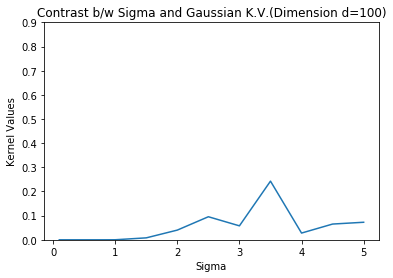

In [6]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10
dim=100

def gaussian_kernel(distances,sigma=1.0): 
    kernel_vals = np.exp( - (distances/sigma) **2) 
    return kernel_vals

def distance_from_origin(data):
    temp_sum=0
    for k in range(dim):
        temp_sum+=data[k]**2
    dist=temp_sum**0.5
    return dist
    
random.seed(100)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))

sigmas=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,2,2.5,3,3.5,4,4.5,5]
final_kernel_vals=[]

for sigma in sigmas:
    centroid, label = kmeans2(actual_data,M,minit='points')
    #print(centroid)
    centroid_distances_from_center=np.zeros(M)
       
    for i in range(M):
        centroid_distances_from_center[i]=distance_from_origin(centroid[i])
    #print(centroid_distances_from_center)
        
    farthest_centroid_distance=centroid_distances_from_center[0]
    f=0
    store_f=0
    for c in centroid_distances_from_center:
        if c>farthest_centroid_distance:
            farthest_centroid_distance=c
            store_f=f
        f=f+1
            
    farthest_centroid=centroid[store_f]
    #print(farthest_centroid)
        
    nearest_centroid_distance=centroid_distances_from_center[0]
    n=0
    store_n=0
    for c in centroid_distances_from_center:
        if c<nearest_centroid_distance:
            nearest_centroid_distance=c
            store_n=n
        n=n+1
            
    nearest_centroid=centroid[store_n]
    #print(nearest_centroid)
        
    distances_from_farthest_centroid = []
    distances_from_nearest_centroid = []
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-farthest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_farthest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-nearest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_nearest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    kernel_vals_for_farthest_centroid=np.zeros(N)
    kernel_vals_for_nearest_centroid=np.zeros(N)
    for i in range(N):
        kernel_vals_for_farthest_centroid[i] = gaussian_kernel(distances_from_farthest_centroid[i],sigma)
        kernel_vals_for_nearest_centroid[i] = gaussian_kernel(distances_from_nearest_centroid[i],sigma)
    
    temp_diff=0
    for l in range(N):
        temp_diff+=abs(kernel_vals_for_farthest_centroid[l]-kernel_vals_for_nearest_centroid[l])
    
    final_kernel_vals.append((1/N)*temp_diff)

fig,ax=plt.subplots()
#print(sigmas)
print(final_kernel_vals)
plt.plot(sigmas,final_kernel_vals)
ax.set_title("Contrast b/w Sigma and Gaussian K.V.(Dimension d="+str(dim)+")")
ax.set_ylim(0,0.9)
ax.set_xlabel('Sigma')
ax.set_ylabel('Kernel Values')
plt.savefig('Contrast between Sigma and Gaussian Kernel Values for dim 100')
plt.show()


